In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
from yellowbrick.classifier import ConfusionMatrix 
from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import RFE

from sklearn.ensemble import RandomForestClassifier

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Estratégias de Otimização

1. Remover itens com alta correlacão
2. Utilizar estratégias de z-score para escalar as features
3. Utilizar o KSelect para selecionar as melhores features
4. Utilizar o Feature Selection (RFE) para selecionar as melhores features

In [3]:
df = pd.read_csv("datasets/WineQT.csv")

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


## Tratamento Inicial dos Dados

In [5]:
df = df.drop(columns=['Id'])

* Removendo a coluna `Id` pois não terá uso

In [6]:
df.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Tratamento das classes 

* A variável `quality` é classificada de 3 até 8
* vamos estabelecer um método fictício onde 
    * 7-8 - Ótimo
    * 5-6 - Bom
    * 3-4 - Ruim

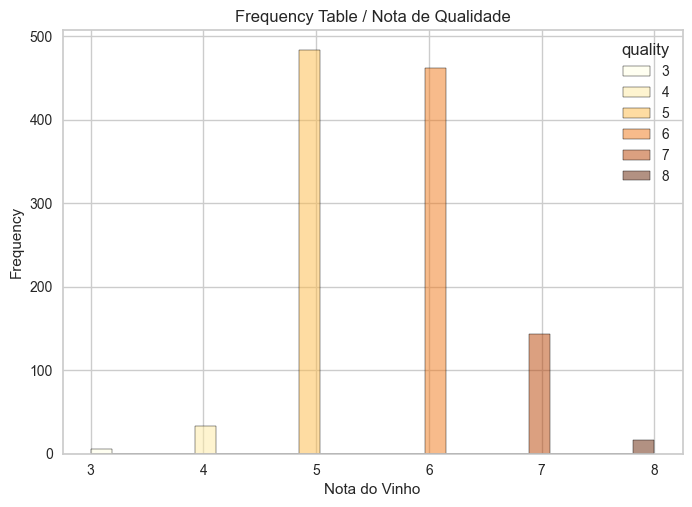

In [8]:
freq = sns.histplot(data=df, x="quality", hue="quality", legend=True, palette="YlOrBr")
freq.set(title='Frequency Table / Nota de Qualidade')
freq.set(xlabel="Nota do Vinho")
freq.set(ylabel="Frequency");
# freq.set(xticklabels=[]);

In [9]:
df['class'] = np.nan

In [10]:
df['class'] = np.where(df['quality'] >= 7, "otimo", df['class'])

In [11]:
df['class'] = np.where(df['quality'] <= 4, "ruim", df['class'])

In [12]:
df['class'] = np.where((df['quality'] >= 5) & (df['quality'] < 7), "bom", df['class'])

In [13]:
df['class'].value_counts()

bom      945
otimo    159
ruim      39
Name: class, dtype: int64

In [14]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
class                   0
dtype: int64

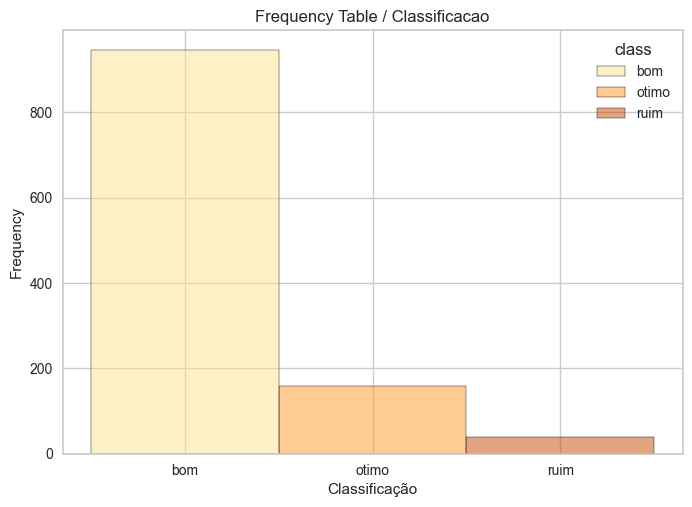

In [15]:
freq = sns.histplot(data=df, x="class", hue="class", legend=True, palette="YlOrBr")
freq.set(title='Frequency Table / Classificacao')
freq.set(xlabel="Classificação")
freq.set(ylabel="Frequency");

In [16]:
df_caracteristicas = df.drop(columns=['quality', 'class'])

In [17]:
df_caracteristicas.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8


In [18]:
classificacao = df['class']

In [19]:
classificacao.head(2)

0    bom
1    bom
Name: class, dtype: object

# Classificação Padrão - Baseline

### Treino e Teste

In [20]:
treino_x, teste_x, treino_y, teste_y = train_test_split(df_caracteristicas.values, 
                                                        classificacao,
                                                        test_size = 0.3,
                                                        random_state=0)

In [21]:
model_base = RandomForestClassifier(n_estimators = 1000, random_state=0, n_jobs=-1)

In [22]:
model_base.fit(treino_x, treino_y)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=0)

In [23]:
previsoes_base = model_base.predict(teste_x)

### Matriz de Confusão - Base

In [24]:
confusao_base = confusion_matrix(teste_y, previsoes_base)

In [25]:
confusao_base

array([[280,   8,   0],
       [ 19,  25,   0],
       [ 11,   0,   0]])

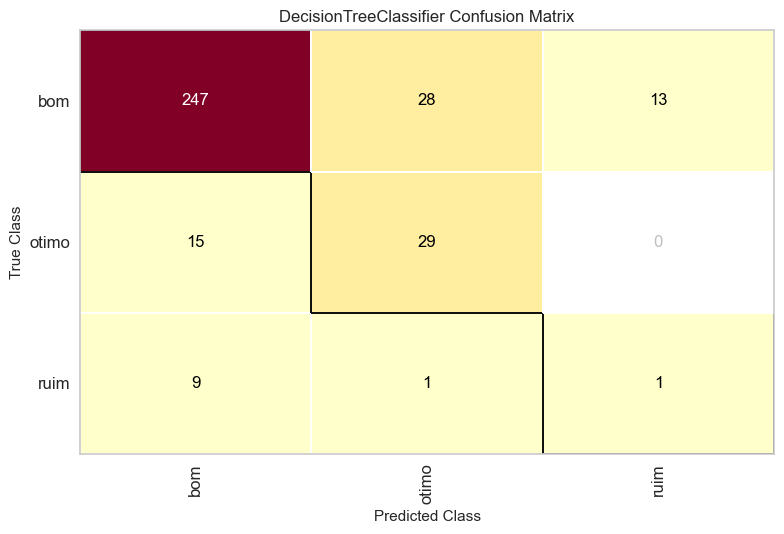

In [26]:
v = ConfusionMatrix(DecisionTreeClassifier())
v.fit(treino_x, treino_y)
v.score(teste_x, teste_y)
v.poof();

### Accuracy Score - Base

In [27]:
taxa_acerto_base = accuracy_score(teste_y, previsoes_base)
taxa_erro_base = 1 - taxa_acerto_base

In [28]:
accuracy_base = taxa_acerto_base * 100

In [29]:
accuracy_base

88.92128279883383

### Recall Score - Base

In [30]:
recall_base = recall_score(teste_y, previsoes_base, average=None)[0] * 100

In [31]:
recall_base

97.22222222222221

# Z-Score para scalar as variáveis na mesma unidade de medida

### Aplicando o StandardScaler - Z-Score

In [32]:
padronizador = StandardScaler()

In [33]:
padronizador.fit(df_caracteristicas.values)

StandardScaler()

In [34]:
df_caracteristicas_scaler = padronizador.transform(df_caracteristicas.values)

In [35]:
df_caracteristicas.values

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.2  ,  0.6  ,  0.08 , ...,  3.45 ,  0.58 , 10.5  ],
       [ 5.9  ,  0.55 ,  0.1  , ...,  3.52 ,  0.76 , 11.2  ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ]])

In [36]:
df_caracteristicas_scaler

array([[-0.52157961,  0.93933222, -1.36502663, ...,  1.27069495,
        -0.57365783, -0.96338181],
       [-0.29259344,  1.94181282, -1.36502663, ..., -0.70892755,
         0.1308811 , -0.59360107],
       [-0.29259344,  1.27349242, -1.16156762, ..., -0.32577481,
        -0.04525363, -0.59360107],
       ...,
       [-1.20853813,  0.38239855, -0.9581086 , ...,  0.88754221,
        -0.45623467,  0.05351522],
       [-1.38027776,  0.10393172, -0.8563791 , ...,  1.33455374,
         0.60057372,  0.70063152],
       [-1.38027776,  0.6330187 , -0.75464959, ...,  1.65384769,
         0.30701583, -0.22382033]])

### Treino e Teste - Scaled

In [37]:
treino_x, teste_x, treino_y, teste_y = train_test_split(df_caracteristicas_scaler, 
                                                        classificacao,
                                                        test_size = 0.3,
                                                        random_state=0)

In [38]:
model_scaled = RandomForestClassifier(n_estimators = 1000, random_state=0, n_jobs=-1)

In [39]:
model_scaled.fit(treino_x, treino_y)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=0)

In [40]:
previsoes_scaled = model_scaled.predict(teste_x)

### Matriz de Confusão - Scaled

In [41]:
confusao_scaled = confusion_matrix(teste_y, previsoes_scaled)

In [42]:
confusao_scaled

array([[280,   8,   0],
       [ 18,  26,   0],
       [ 11,   0,   0]])

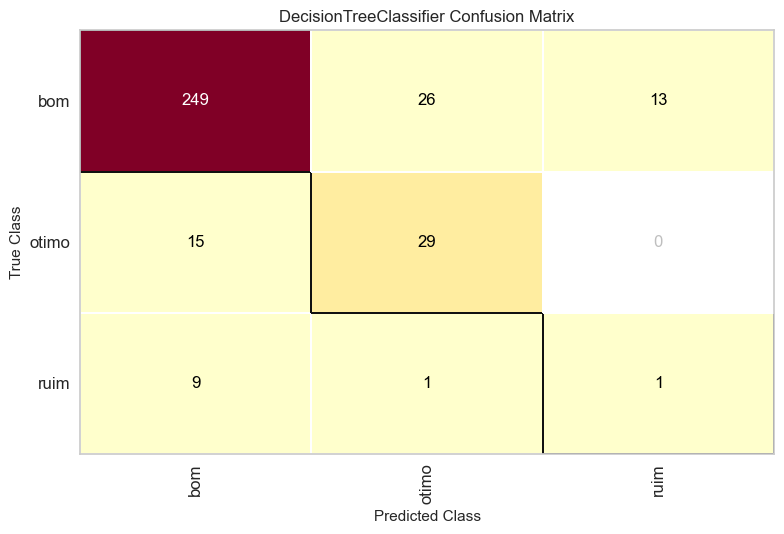

In [43]:
v = ConfusionMatrix(DecisionTreeClassifier())
v.fit(treino_x, treino_y)
v.score(teste_x, teste_y)
v.poof();

### Accuracy Score - Scaled

In [44]:
taxa_acerto_scaled = accuracy_score(teste_y, previsoes_scaled)
taxa_erro_scaled = 1 - taxa_acerto_scaled

In [45]:
accuracy_scaled = taxa_acerto_scaled * 100

In [46]:
accuracy_scaled

89.21282798833819

### Recall Score - Scaled

In [47]:
recall_scaled = recall_score(teste_y, previsoes_scaled, average=None)[0] * 100

In [48]:
recall_scaled

97.22222222222221

# Seleção das Melhores Features - KSelect

In [49]:
df_caracteristicas.shape

(1143, 11)

In [50]:
df_caracteristicas_kselect = SelectKBest(chi2, k=6).fit_transform(df_caracteristicas, classificacao)

* Reduzir o dataset para as 5 melhores features k=6

In [51]:
df_caracteristicas_kselect.shape

(1143, 6)

In [52]:
df_caracteristicas_kselect

array([[7.40e+00, 7.00e-01, 0.00e+00, 1.10e+01, 3.40e+01, 9.40e+00],
       [7.80e+00, 8.80e-01, 0.00e+00, 2.50e+01, 6.70e+01, 9.80e+00],
       [7.80e+00, 7.60e-01, 4.00e-02, 1.50e+01, 5.40e+01, 9.80e+00],
       ...,
       [6.20e+00, 6.00e-01, 8.00e-02, 3.20e+01, 4.40e+01, 1.05e+01],
       [5.90e+00, 5.50e-01, 1.00e-01, 3.90e+01, 5.10e+01, 1.12e+01],
       [5.90e+00, 6.45e-01, 1.20e-01, 3.20e+01, 4.40e+01, 1.02e+01]])

### Treino e Teste - Kselect

In [53]:
treino_x, teste_x, treino_y, teste_y = train_test_split(df_caracteristicas_kselect, 
                                                        classificacao,
                                                        test_size = 0.3,
                                                        random_state=0)

In [54]:
model_kselect = RandomForestClassifier(n_estimators = 1000, random_state=0, n_jobs=-1)

In [55]:
model_kselect.fit(treino_x, treino_y)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=0)

In [56]:
previsoes_kselect = model_kselect.predict(teste_x)

### Matriz de Confusão - Kselect

In [57]:
confusao_kselect = confusion_matrix(teste_y, previsoes_kselect)

In [58]:
confusao_kselect

array([[279,   9,   0],
       [ 20,  24,   0],
       [ 11,   0,   0]])

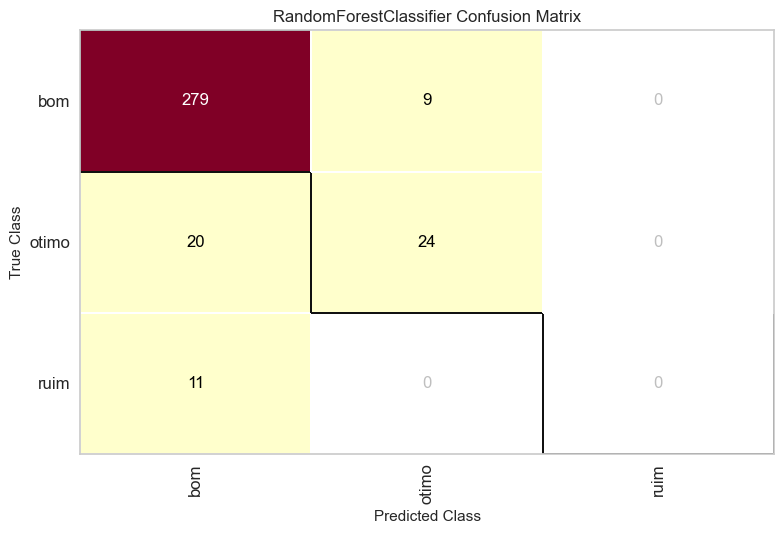

In [59]:
v = ConfusionMatrix(RandomForestClassifier(n_estimators = 1000, random_state=0, n_jobs=-1))
v.fit(treino_x, treino_y)
v.score(teste_x, teste_y)
v.poof();

### Accuracy Score - Kselect

In [60]:
taxa_acerto_kselect = accuracy_score(teste_y, previsoes_kselect)
taxa_erro_kselect = 1 - taxa_acerto_kselect

In [61]:
accuracy_kselect = taxa_acerto_kselect * 100

In [62]:
accuracy_kselect

88.33819241982506

### Recall Score - Kselect

In [63]:
recall_kselect = recall_score(teste_y, previsoes_kselect, average=None)[0] * 100

In [64]:
recall_kselect

96.875

# Seleção das Melhores Features - Recursive Feature Elimination

In [65]:
df_caracteristicas.shape

(1143, 11)

In [66]:
model_rfe = RandomForestClassifier(n_estimators = 1000, random_state=0, n_jobs=-1)

### Treino e Teste - RFE

In [67]:
treino_x, teste_x, treino_y, teste_y = train_test_split(df_caracteristicas.values, 
                                                        classificacao,
                                                        test_size = 0.3,
                                                        random_state=0)

In [68]:
selector = RFE(model_rfe, n_features_to_select=5, step=1)

In [69]:
selector = selector.fit(treino_x, treino_y)

In [70]:
selector.support_

array([False,  True, False, False, False, False,  True,  True, False,
        True,  True])

In [71]:
selector.ranking_

array([4, 1, 3, 5, 2, 7, 1, 1, 6, 1, 1])

In [72]:
treino_rfe = selector.transform(treino_x)

In [73]:
teste_rfe = selector.transform(teste_x)

In [74]:
model_rfe.fit(treino_rfe, treino_y)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=0)

In [75]:
previsoes_rfe = model_rfe.predict(teste_rfe)

### Matriz de Confusão - RFE

In [76]:
confusao_rfe = confusion_matrix(teste_y,previsoes_rfe)

In [77]:
confusao_rfe

array([[277,  11,   0],
       [ 16,  28,   0],
       [ 11,   0,   0]])

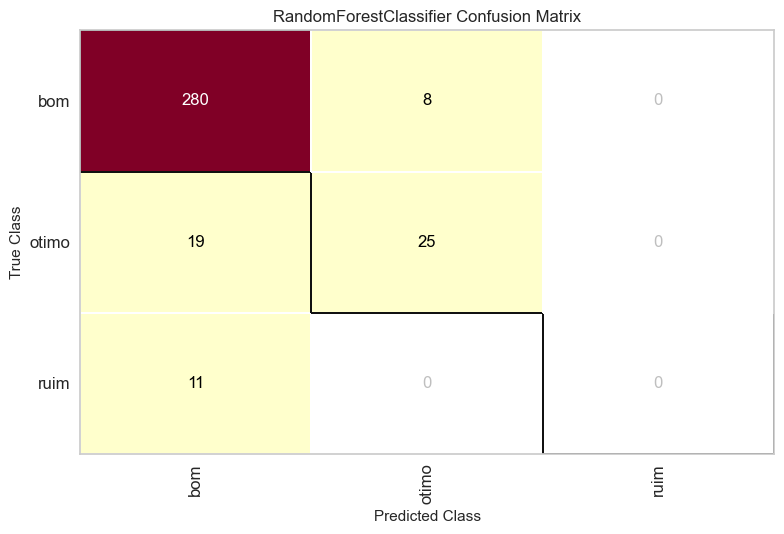

In [78]:
v = ConfusionMatrix(RandomForestClassifier(n_estimators = 1000, random_state=0, n_jobs=-1))
v.fit(treino_x, treino_y)
v.score(teste_x, teste_y)
v.poof();

### Accuracy Score - RFE

In [79]:
taxa_acerto_rfe = accuracy_score(teste_y, previsoes_rfe)
taxa_erro_rfe = 1 - taxa_acerto_rfe

In [80]:
accuracy_rfe = taxa_acerto_kselect * 100

In [81]:
accuracy_rfe

88.33819241982506

### Recall Score - Kselect

In [82]:
recall_rfe = recall_score(teste_y, previsoes_rfe, average=None)[0] * 100

In [83]:
recall_rfe

96.18055555555556